## Linear Regression

### Regression on Video Games Sales

Welcome, my name is Han Oktavianus, in this dataset I will try analyze and build a model for Video Games Sales Dataset.

### Step 1 : Import Libraries

In [1]:

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder


# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : EDA

In [2]:
# Let's load the dataset as df

df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# The size of dataset

df.shape

(16598, 11)

In [4]:
# More info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Statistical information from Dataset

df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
# Check the null values

df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Since there only few null values and we could not replace it because we don't have additional information and can't risk false information.

df = df.dropna()

In [8]:
# Let's double check the missing values after we remove it

df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Text(0, 0.5, 'Counts')

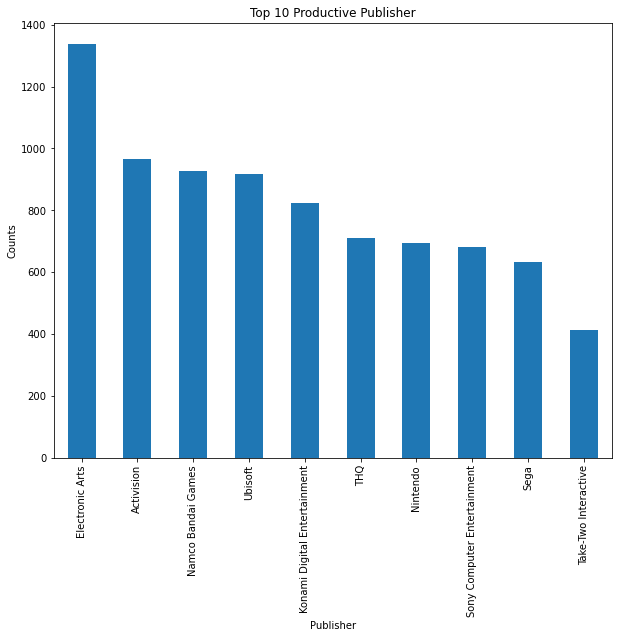

In [9]:
# Top 10 Publisher

df.groupby('Publisher')['Year'].count().sort_values(ascending=False)[0:10].plot(kind='bar',title='Top 10 Productive Publisher',figsize=(10,8) ).set_ylabel('Counts')

Text(0, 0.5, 'Revenue in millions')

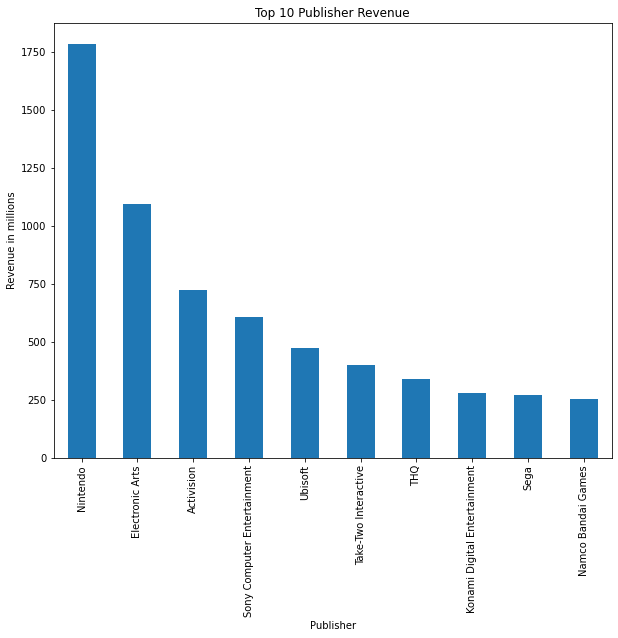

In [10]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',title='Top 10 Publisher Revenue',figsize=(10,8) ).set_ylabel('Revenue in millions')

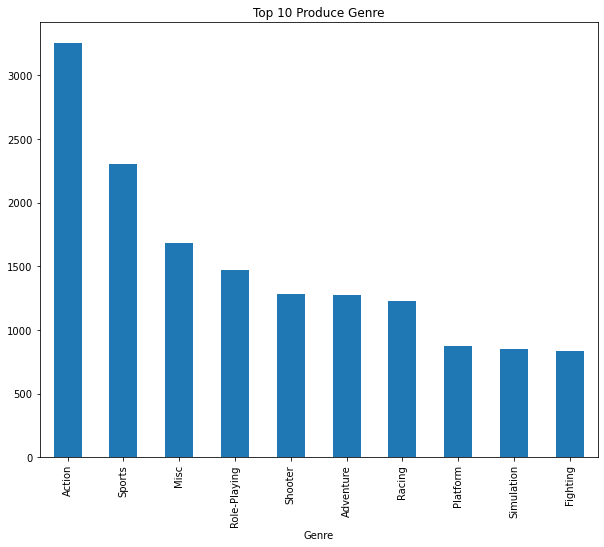

In [11]:
df.groupby('Genre')['Global_Sales'].count().sort_values(ascending=False)[0:10].plot(kind='bar',title='Top 10 Produce Genre',figsize=(10,8))

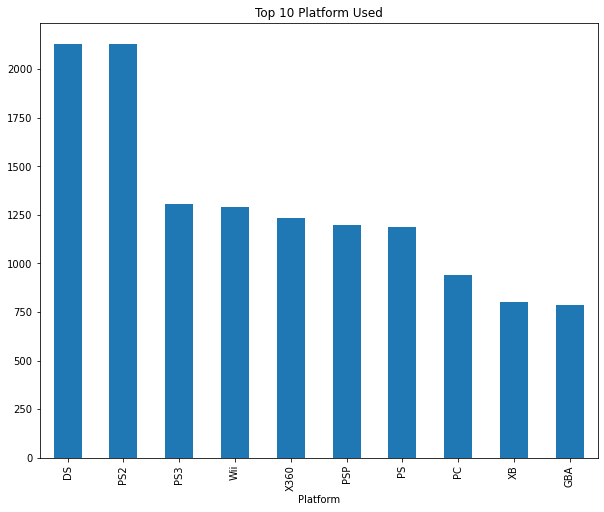

In [12]:
df.groupby('Platform')['Global_Sales'].count().sort_values(ascending=False)[0:10].plot(kind='bar',title='Top 10 Platform Used',figsize=(10,8))

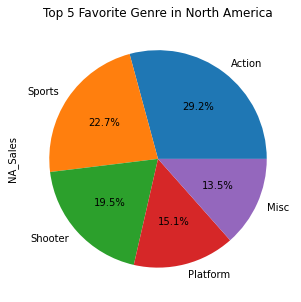

In [13]:
# Let us gather share market information in North America by genres, it will be a vital information to our Develophe team.


df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)[0:5].plot(kind='pie',title='Top 5 Favorite Genre in North America',figsize=(5,5),autopct='%1.1f%%')

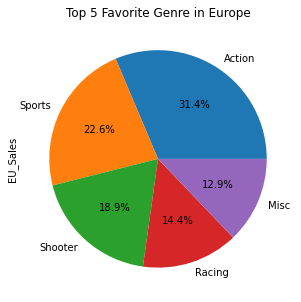

In [14]:
# Let us gather share market information in Europe by genres, it will be a vital information to our Develophe team.


df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)[0:5].plot(kind='pie',title='Top 5 Favorite Genre in Europe',figsize=(5,5),autopct='%1.1f%%')

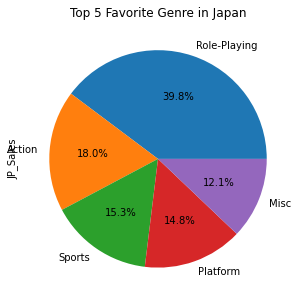

In [15]:
# Let us gather share market information in Japan by genres, it will be a vital information to our Develophe team.


df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)[0:5].plot(kind='pie',title='Top 5 Favorite Genre in Japan',figsize=(5,5),autopct='%1.1f%%')

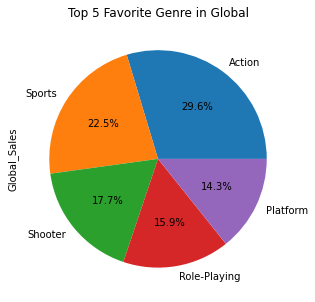

In [16]:
# Let us gather share market information in Global by genres, it will be a vital information to our Develophe team.


df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)[0:5].plot(kind='pie',title='Top 5 Favorite Genre in Global',figsize=(5,5),autopct='%1.1f%%')

## Step 3 : Preprocessing Data

In [17]:
# Let us change our categorical data into numerical data

le = LabelEncoder()

df['Genre'] = le.fit_transform(df['Genre'])
df['Platform'] = le.fit_transform(df['Platform'])

In [18]:
# Now we split the selected features into train,test,split

X = df[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Global_Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=22)

In [19]:
# We normalize the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
# Let us make a function that will help us through the model results

models = ['Linear Regression', 'Ridge', 'Lasso']

R2_scores = []


def result(model, prediction, accuracy, model_name):
    score = model.score(X_test,y_test)
    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = mean_squared_error(y_test,prediction)**0.5
    R2 = r2_score(y_test,prediction)
    R2_scores.append(R2)
    print('')
    print('##### '+ model_name +" #####")
    print('Score      : %.4f'  % score)
    print(accuracy)
    print('')
    print('MAE  Score : %0.2f' % mae)
    print('MSE  Score : %0.2f' % mse)
    print('RMSE Score : %0.2f' % rmse)
    print('R2   Score : %0.2f' % R2)

## Step 4 : Build the models

In [21]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train,y_train)
accuracies = cross_val_score(lr,X_train,y_train,cv=10,verbose=1)
lr_pred = lr.predict(X_test)

result(lr,lr_pred,accuracies,'Linear Regression')


##### Linear Regression #####
Score      : 0.9722
[0.99997214 0.99998513 0.99998631 0.99998637 0.99998556 0.99998696
 0.99998856 0.99998929 0.99998973 0.99998508]

MAE  Score : 0.09
MSE  Score : 0.09
RMSE Score : 0.31
R2   Score : 0.97


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [22]:
# Ridge

rd = Ridge(normalize=True)
rd.fit(X_train,y_train)
rd_accuracies = cross_val_score(rd,X_train,y_train,cv=10,verbose=1)
rd_pred= rd.predict(X_test)

result(rd,rd_pred,rd_accuracies,'Ridge')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



##### Ridge #####
Score      : 0.8356
[0.91242249 0.88784204 0.87489458 0.88092329 0.9156317  0.92146582
 0.91345969 0.93358194 0.92149272 0.90151193]

MAE  Score : 0.24
MSE  Score : 0.56
RMSE Score : 0.75
R2   Score : 0.84


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [23]:
# Let's go deep with hyperparameter to Ridge

param_dict={'alpha':[1,2,3]}
gr_rd = GridSearchCV(rd,param_dict,scoring='r2')
gr_rd.fit(X_train,y_train)
rd_best = gr_rd.best_estimator_
print('Score  : %0.2f'  % rd_best.score(X_test,y_test))
gr_rd_pred = rd_best.predict(X_test)
r2_sc = r2_score(y_test,gr_rd_pred)
print('R2 Score : %0.2f' % r2_sc)

Score  : 0.84
R2 Score : 0.84


In [24]:
# Lasso

ls = Lasso()
ls.fit(X_train,y_train)
ls_accuracies = cross_val_score(ls,X_train,y_train,cv=10,verbose=1)
ls_pred = ls.predict(X_test)

result(ls,ls_pred,ls_accuracies,'Lasso')


##### Lasso #####
Score      : 0.3201
[0.41819325 0.42059198 0.35968071 0.42491719 0.35840633 0.3319984
 0.3349544  0.31603729 0.3063835  0.41765532]

MAE  Score : 0.50
MSE  Score : 2.31
RMSE Score : 1.52
R2   Score : 0.32


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [25]:
# It's pretty bad score from Lasso model, let's see if we can improve our model with hyperparameter tuning

param_dicts = {'alpha':[1,2,3]}
ls_gr = GridSearchCV(ls,param_dicts,scoring='r2')
ls_gr.fit(X_train,y_train)
ls_best = ls_gr.best_estimator_
print('Score   : %0.2f' % ls_best.score(X_test,y_test))
ls_pred = ls_best.predict(X_test)
r2_ls = r2_score(y_test,ls_pred)
print('R2 Score : %0.2f' % r2_ls)

Score   : 0.32
R2 Score : 0.32


In [26]:
compare = pd.DataFrame({'Algorithms' : models, 'R2-Scores' : R2_scores})
compare.sort_values(by='R2-Scores', ascending=False)

,Algorithms,R2-Scores
0,Linear Regression,0.972228
1,Ridge,0.835615
2,Lasso,0.320079


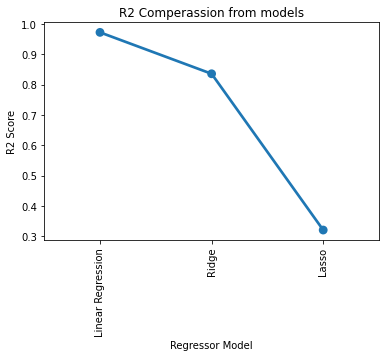

In [27]:
# Let us plot the result

f,ax=plt.subplots()
sns.pointplot(x=models, y=R2_scores)
plt.xlabel('Regressor Model')
ax.set_xticklabels(models,rotation=90)
plt.ylabel('R2 Score')
plt.title('R2 Comperassion from models')
plt.show()

## Step 5 : Conclusion

The best model for this dataset is Linear Regression model. Thank you for your attention.